<a href="https://colab.research.google.com/github/reshmaaashaik/Titanic-Survival-Prediction/blob/main/IMDB_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India (3).csv


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Upload the file interactively
uploaded = files.upload()

# Load the dataset with specified encoding and error handling
file_name = list(uploaded.keys())[0]
# Replace 'error_bad_lines=False' with 'on_bad_lines='skip'' to skip bad lines
data = pd.read_csv(file_name, encoding='latin1', on_bad_lines='skip', sep=',')  # Try sep=';' or sep='\t' if comma doesn't work

# View the first few rows and line 10 specifically
print(data.head())
print(data.iloc[9:11])  # Print line 10 and the one before/after for context

Saving IMDb Movies India.csv to IMDb Movies India (5).csv
   ï»¿Year Duration                      Genre  Rating  Votes        Director  \
0    -2019  109 min                      Drama     7.0      8   Gaurav Bakshi   
1    -2019  110 min            Comedy, Romance     4.4     35      Ovais Khan   
2    -1997  147 min     Comedy, Drama, Musical     4.7    827    Rahul Rawail   
3    -2005  142 min        Drama, Romance, War     7.4  1,086  Shoojit Sircar   
4    -2012   82 min  Horror, Mystery, Thriller     5.6    326   Allyson Patel   

           Actor 1                 Actor 2          Actor 3  
0     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
1          Prateik              Ishita Raj  Siddhant Kapoor  
2       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
3  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
4        Yash Dave          Muntazir Ahmad     Kiran Bhatia  
    ï»¿Year Duration                   Genre  Rating  Votes      Director  \
9     

In [29]:
print("Column Names in Dataset:")
print(data.columns.tolist())


Column Names in Dataset:
['ï»¿Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [30]:
from google.colab import files
import pandas as pd # Add this line to import pandas

from google.colab import files
import pandas as pd # Add this line to import pandas

uploaded = files.upload()

data = pd.read_csv("IMDb Movies India.csv", encoding='latin1')  # Try 'ISO-8859-1' if this doesn't work
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Check unique values in categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}:\n{data[column].unique()}\n")
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Check unique values in categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}:\n{data[column].unique()}\n")

Saving IMDb Movies India.csv to IMDb Movies India (6).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6

In [31]:
import pandas as pd
import numpy as np # Import numpy and alias it as np

numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# For categorical columns, fill with mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-31-0ac01ea186fa>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [33]:
# Check for problematic values in the dataset
print(data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].head())
print(data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].dtypes)


   Genre  Director  Actor 1  Actor 2  Actor 3
0    299      1926     2250      800     3108
1    299      1548     3280     4790      527
2    351      5123     3713     2866     3450
3    228      3319     2917     1504     4020
4    299       385     3112     3462      405
Genre       int64
Director    int64
Actor 1     int64
Actor 2     int64
Actor 3     int64
dtype: object


In [34]:
# Replace empty strings or spaces with 'Unknown'
data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']] = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].replace(' ', 'Unknown')


In [35]:
# Encode categorical variables
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for column in categorical_columns:
    data[column] = data[column].astype(str)  # Ensure all values are strings
    data[column] = LabelEncoder().fit_transform(data[column])


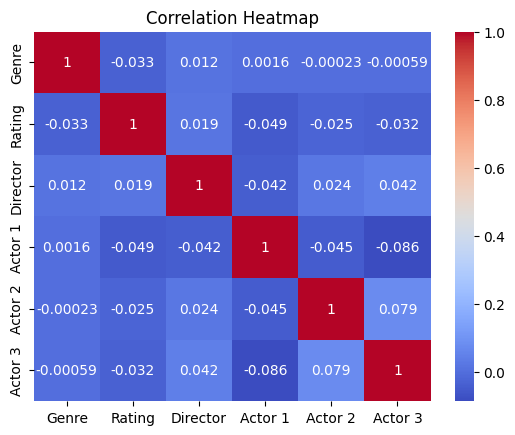

In [37]:
# Replace empty strings or spaces with NaN and then fill with the most frequent value
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].replace(' ', np.nan)  # Replace spaces with NaN
    data[column] = data[column].fillna(data[column].mode()[0])  # Fill NaN with mode

# Encode categorical variables to numerical representation using Label Encoding
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for column in categorical_columns:
    data[column] = data[column].astype(str)  # Ensure all values are strings
    data[column] = LabelEncoder().fit_transform(data[column])

# Compute correlation matrix on numerical data only
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
# Define features (X) and target (y)
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]  # Use the relevant feature columns
y = data['Rating']  # Use the target column

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (12407, 5)
Testing set size: (3102, 5)


In [39]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Check the coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [-2.15508295e-04  1.58271863e-05 -3.73695151e-05 -2.30716490e-05
 -2.55224733e-05]
Model Intercept: 6.044860316019154


In [40]:
# Predict ratings
y_pred = model.predict(X_test)

# Display first few predictions and actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


         Actual  Predicted
11115  5.841621   5.822200
2921   6.800000   5.890777
3463   5.841621   5.804579
2495   5.841621   5.778329
15263  5.841621   5.759379


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.9596954163491115
R-squared: 0.00289041298655901


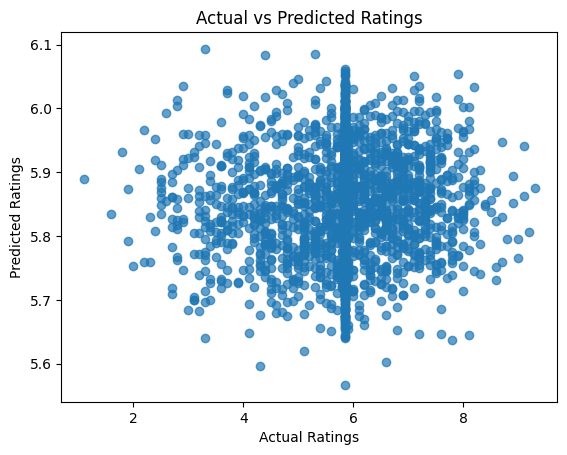

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()
